## PEAK 3 Y24 phosphorylation

model PEAK3

J0: PEAK3_Y24 -> PEAK3_Y24P; J0_Vmax*PEAK3_Y24/(J0_Km + PEAK3_Y24)
J1: PEAK3_Y24P -> PEAK3_Y24; J1_Vmax*PEAK3_Y24P/(J1_Km + PEAK3_Y24P)

# State variables in the system
PEAK3_Y24=100
PEAK3_Y24P=0

# Parameters in the system
J0_Km=100
J0_Vmax=10
J1_Km=100
J1_Vmax=10

end


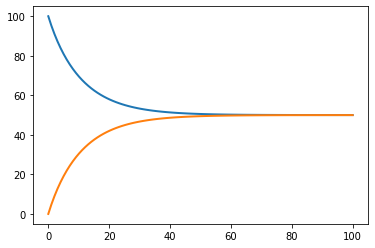

In [4]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *

model = ModelBuilder('PEAK3')
model.add_reaction(Reaction(michaelis_menten, ('PEAK3_Y24',), ('PEAK3_Y24P',)))
model.add_reaction(Reaction(michaelis_menten, ('PEAK3_Y24P',), ('PEAK3_Y24',), reactant_values=0, product_values=100))

print(model.get_antimony_model())

model.simulate(0, 100, 100)
model.plot()


In [ ]:
# use antimony's default modularity to create model 

import antimony
import roadrunner
import matplotlib.pyplot as plt

ant_model = """

model MichaelisMenten(F, B)
    J0:F -> B; Vmf * F / (Kmf + F)
    J1:B -> F; Vmb * B / (Kmb + B)

    # default values
    Vmf = 10
    Vmb = 10
    Kmf = 100
    Kmb = 100
end

model SimpleMassAction(A, B)
    J0:A -> B; ka * A - kd * B
    J1:B -> A; kd * B - ka * A
    # default values
    ka = 0.01
    kd = 0.01
end

model MassAction21(A,B,AB)
    J0:A + B -> AB; ka * A * B - kd * AB
    J1:AB -> A + B; kd * AB - ka * A * B

    # default values
    ka = 0.001
    kd = 0.01

    # bound variables
    TA = A + AB
    TB = B + AB

end


model simple_peak3
    # Examples of different rate laws and initialization
    
    E0: MassAction21(PEAK3, GRB2, PEAK3_GRB2)
    E1: MassAction21(PEAK3, CRKII, PEAK3_CRKII)
    E2: MassAction21(TotalGRB2, ASAP1, GRB2_ASAP1)
    E3: MassAction21(TotalCRKII, ASAP1, CRKII_ASAP1)

    PEAK3 = 100 
    GRB2 = 100
    CRKII = 100
    TotalGRB2 = GRB2 + PEAK3_GRB2 
    TotalCRKII = CRKII + PEAK3_CRKII
    ASAP1 = 100

end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print('Antimony model compiled without error')
else:
    print(code)
r_model = roadrunner.RoadRunner(sbml_model)
# r_model.model['S3'] = 1
# print(r_model.model['S3'])


r_solved = r_model.simulate(0, 100, 100)

print(r_solved)

r_model.plot()

# plt.plot(r_solved['time'], label='TA')
# plt.legend()
# plt.grid()
# plt.show()

print(r_model.model.keys())
# print(r_model.model['S3'])
# print(r_solved)
# plt.plot(r_solved)


## Testing ground

In [26]:
import itertools

l = ['A', 'B', 'C', 'D']
r = list(itertools.combinations(l, 3))

# A bind both B and C
# D bind to either B or C

print(r)

[('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'C', 'D'), ('B', 'C', 'D')]


In [ ]:
## Representing Protein A with 1 binding site 
# A_0 + B -> A_1B